In [1]:
 # import basic package
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#Deal with warnings
import warnings
warnings.filterwarnings('ignore')
style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

#import my own packages
# import fraud_fun
# import myfunc_pd as mf


# from binary encoder import package 
import category_encoders as ce

#import package for ML and feature engineering
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.svm import SVC, OneClassSVM
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from imblearn.under_sampling import NearMiss
import lightgbm
from sklearn.externals import joblib

/anaconda3/envs/python/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Reading Full dataset

In [2]:
train = pd.read_csv('FullData_nor_train.csv')
train.drop(columns='Unnamed: 0',inplace=True)
test = pd.read_csv('FullData_nor_test.csv')
test.drop(columns='Unnamed: 0',inplace=True)

train.shape, test.shape

((590540, 571), (506691, 570))

In [3]:
train.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_35_NotFound,id_35_T,id_36_NotFound,id_36_T,id_37_NotFound,id_37_T,id_38_NotFound,id_38_T,DeviceType_desktop,DeviceType_mobile
0,0.0,0.002137,0.743044,0.525111,0.381679,0.306569,0.488636,0.836957,0.001847,0.019948,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000900,0.100885,0.608000,0.381679,0.014599,0.511364,0.836957,0.011521,0.019948,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.001840,0.210566,0.780000,0.381679,0.481752,0.522727,0.836957,0.027902,0.019948,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.001558,0.984824,0.934000,0.381679,0.124088,0.854545,0.836957,0.011521,0.019948,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001558,0.201023,0.828000,0.381679,0.014599,0.727273,0.836957,0.011521,0.019948,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [4]:
test.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_36_T,id_37_NotFound,id_37_T,id_38_NotFound,id_38_T,DeviceType_desktop,DeviceType_mobile,card6_debit or credit,id_34_match_status:-1,id_34_match_status:0
0,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,0.000124,0.025744,0.002034,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
1,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,0.000495,0.025744,0.001017,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,0.326074,0.025744,0.000678,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
3,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,0.002104,0.025744,0.001695,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
4,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,0.000742,0.025744,0.002034,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0


# Modelling based on 80% of dataset

In [5]:
training, testing = train_test_split(train,test_size=0.2, random_state=42)

# Feature Selection (chi2)

In [6]:
training.shape, testing.shape

((472432, 571), (118108, 571))

In [7]:
training.head(2)

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_35_NotFound,id_35_T,id_36_NotFound,id_36_T,id_37_NotFound,id_37_T,id_38_NotFound,id_38_T,DeviceType_desktop,DeviceType_mobile
5307,0.0,0.001840,0.229248,0.468,0.381679,0.919708,0.488636,0.836957,0.004083,0.019948,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
191582,0.0,0.000724,0.164808,0.392,0.648855,0.919708,0.433486,0.834789,0.011521,0.000602,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
#Create array from data values
array = training.values

#Split the data into input and target
X = array[:,1:]
Y = array[:,0]

#We will select the features using chi square
chi2_selector = SelectKBest(score_func=chi2, k=350)
fit = chi2_selector.fit(X, Y)

features = fit.transform(X)

In [13]:
# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(training.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

,ftr,score,pval
0,isFraud,1.037119,3.084924e-01
1,TransactionAmt,13.541003,2.334077e-04
2,card1,0.526851,4.679340e-01
3,card2,200.068694,2.017629e-45
4,card3,65.325831,6.348376e-16
5,card5,1.151591,2.832164e-01
6,addr1,0.228520,6.326237e-01
7,addr2,2.429117,1.190999e-01
8,dist1,0.207016,6.491161e-01
9,dist2,130.603609,3.023327e-30


In [14]:
feature_columns = [c for c in training.columns if c != 'isFraud']
new_features = []
mask = fit.get_support() #list of booleansnew_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_columns):
    if bool:
        new_features.append(feature)

train = pd.DataFrame(training[new_features], columns=new_features)
train['isFraud'] = Y

In [15]:
print(f'training: {training.shape}, testing: {testing.shape}\n, train: {train.shape}, test:{test.shape}')

training: (472432, 571), testing: (118108, 571)
, train: (472432, 351), test:(506691, 570)


# Over_sampling

In [8]:
# Divide by class
Normal = training[training['isFraud'] == 0]
Fraud = training[training['isFraud'] == 1]

# Set-up the target and feature columns
target_column = 'isFraud'
feature_columns = [c for c in training.columns if c != target_column]

# Pass the values into X and y
y = training[target_column]
X = training[feature_columns]

print(Normal.shape, Fraud.shape)

(456011, 571) (16421, 571)


In [9]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(ratio=0.5, random_state=42)
X_res, y_res = os.fit_sample(X,y)

In [10]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Oversampling dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 456011, 1.0: 16421})
Oversampling dataset shape Counter({0.0: 456011, 1.0: 228005})


# Modelling (Supervised ML)

In [11]:
# Reading testing (20% of Full dataset) for future testing.
target_column = 'isFraud'


y_ = testing[target_column].values
X_ = testing[feature_columns].values



In [12]:
y = training[target_column].values
X = training[feature_columns].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [13]:
X.shape,X_train.shape,X_test.shape

((472432, 570), (377945, 570), (94487, 570))

## LGBM

In [15]:
# LGBM
# categorical_features = [c for c in train.columns]

train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'True',
    'boosting': 'gbdt',
    'num_leaves': 500,
    'reg_alpha': 0.2,
    'reg_lambda': 0.6,
    'feature_fraction': 0.5,
    'bagging_fraction': 1.0,
    'bagging_freq': 20,
    'learning_rate': 0.08,
    'verbose': 0
}

lgbm_model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)



[1]	valid_0's auc: 0.865029
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.891719
[3]	valid_0's auc: 0.901663
[4]	valid_0's auc: 0.907186
[5]	valid_0's auc: 0.911546
[6]	valid_0's auc: 0.915104
[7]	valid_0's auc: 0.918479
[8]	valid_0's auc: 0.920793
[9]	valid_0's auc: 0.923204
[10]	valid_0's auc: 0.924756
[11]	valid_0's auc: 0.925968
[12]	valid_0's auc: 0.927822
[13]	valid_0's auc: 0.929388
[14]	valid_0's auc: 0.930339
[15]	valid_0's auc: 0.931577
[16]	valid_0's auc: 0.932582
[17]	valid_0's auc: 0.933557
[18]	valid_0's auc: 0.934312
[19]	valid_0's auc: 0.934659
[20]	valid_0's auc: 0.935416
[21]	valid_0's auc: 0.936334
[22]	valid_0's auc: 0.937284
[23]	valid_0's auc: 0.937965
[24]	valid_0's auc: 0.93849
[25]	valid_0's auc: 0.939204
[26]	valid_0's auc: 0.939525
[27]	valid_0's auc: 0.940164
[28]	valid_0's auc: 0.940926
[29]	valid_0's auc: 0.941474
[30]	valid_0's auc: 0.941876
[31]	valid_0's auc: 0.942538
[32]	valid_0's auc: 0.942871
[33]	valid_0's auc:

[277]	valid_0's auc: 0.966472
[278]	valid_0's auc: 0.966419
[279]	valid_0's auc: 0.966418
[280]	valid_0's auc: 0.966401
[281]	valid_0's auc: 0.966446
[282]	valid_0's auc: 0.96649
[283]	valid_0's auc: 0.966513
[284]	valid_0's auc: 0.966544
[285]	valid_0's auc: 0.96652
[286]	valid_0's auc: 0.966468
[287]	valid_0's auc: 0.966472
[288]	valid_0's auc: 0.966505
[289]	valid_0's auc: 0.966515
[290]	valid_0's auc: 0.966568
[291]	valid_0's auc: 0.966609
[292]	valid_0's auc: 0.966601
[293]	valid_0's auc: 0.966638
[294]	valid_0's auc: 0.966646
[295]	valid_0's auc: 0.966644
[296]	valid_0's auc: 0.96665
[297]	valid_0's auc: 0.966667
[298]	valid_0's auc: 0.966662
[299]	valid_0's auc: 0.966649
[300]	valid_0's auc: 0.966728
[301]	valid_0's auc: 0.966735
[302]	valid_0's auc: 0.966752
[303]	valid_0's auc: 0.966746
[304]	valid_0's auc: 0.966748
[305]	valid_0's auc: 0.966777
[306]	valid_0's auc: 0.966773
[307]	valid_0's auc: 0.966825
[308]	valid_0's auc: 0.966808
[309]	valid_0's auc: 0.966854
[310]	valid_0

[552]	valid_0's auc: 0.967267
[553]	valid_0's auc: 0.967274
[554]	valid_0's auc: 0.96727
[555]	valid_0's auc: 0.967274
[556]	valid_0's auc: 0.967276
[557]	valid_0's auc: 0.967265
[558]	valid_0's auc: 0.967246
[559]	valid_0's auc: 0.967216
[560]	valid_0's auc: 0.967208
[561]	valid_0's auc: 0.967205
[562]	valid_0's auc: 0.967192
[563]	valid_0's auc: 0.967203
[564]	valid_0's auc: 0.967175
[565]	valid_0's auc: 0.967133
[566]	valid_0's auc: 0.967119
[567]	valid_0's auc: 0.967122
[568]	valid_0's auc: 0.967117
[569]	valid_0's auc: 0.967107
[570]	valid_0's auc: 0.967119
[571]	valid_0's auc: 0.967129
[572]	valid_0's auc: 0.967124
[573]	valid_0's auc: 0.967116
[574]	valid_0's auc: 0.967134
[575]	valid_0's auc: 0.967126
[576]	valid_0's auc: 0.967125
[577]	valid_0's auc: 0.967112
[578]	valid_0's auc: 0.967111
[579]	valid_0's auc: 0.967136
Early stopping, best iteration is:
[479]	valid_0's auc: 0.967457


Accuracy is 0.987987765512716
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     91094
         1.0       0.89      0.76      0.82      3393

    accuracy                           0.99     94487
   macro avg       0.94      0.88      0.91     94487
weighted avg       0.99      0.99      0.99     94487



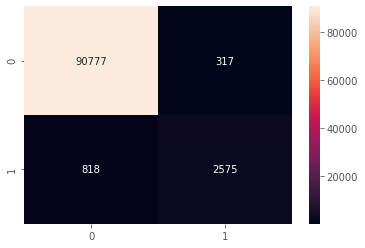

In [21]:
# Validation (80% Dataset training):

y_pred = lgbm_model.predict(X_test)
for i in range(0,len(y_pred)):
    #convert into binary values
    if (y_pred[i] >= 0.3):
        y_pred[i] = 1
    else:
        y_pred[i] =0
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy is {accuracy}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

In [24]:
# For un_balanced dataset (20% from training)
y_pred = lgbm_model.predict(X_)

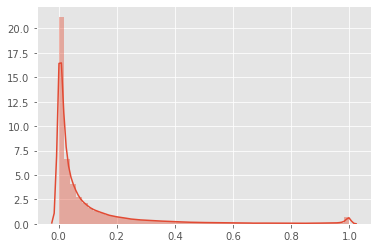

In [25]:
sns.distplot(y_pred);

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    113866
         1.0       0.42      0.82      0.56      4242

    accuracy                           0.95    118108
   macro avg       0.71      0.89      0.77    118108
weighted avg       0.97      0.95      0.96    118108

Accuracy is 0.953203847326176


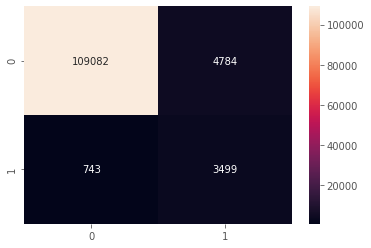

In [28]:
# For real testing:

y_pred = lgbm_model.predict(X_)
for i in range(0,len(y_pred)):
    #convert into binary values
    if (y_pred[i] >= 0.4):
        y_pred[i] = 1
    else:
        y_pred[i] =0
from sklearn.metrics import accuracy_score
print(classification_report(y_, y_pred))
accuracy = accuracy_score(y_pred, y_)
print(f'Accuracy is {accuracy}')
cm = confusion_matrix(y_, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

In [23]:
# Save model LGBM
from sklearn.externals import joblib
joblib.dump(lgbm_model, 'lgbm_model_all.sav')

['lgbm_model_all.sav']

## Random Forest

Training Features Shape: (377945, 350)
Training Labels Shape: (377945,)
Testing Features Shape: (94487, 350)
Testing Labels Shape: (94487,)
********* Start RandomForest Training ************
[[91027    67]
 [ 2514   879]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     91094
         1.0       0.93      0.26      0.41      3393

    accuracy                           0.97     94487
   macro avg       0.95      0.63      0.70     94487
weighted avg       0.97      0.97      0.97     94487

0.9726840729412511


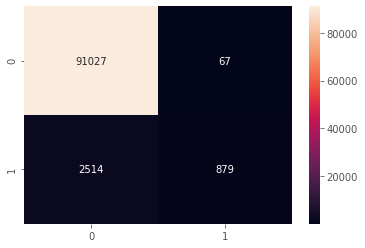

In [352]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print(f'********* StartR andomForest Training ************')

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, random_state=42)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    113866
         1.0       0.95      0.26      0.41      4242

    accuracy                           0.97    118108
   macro avg       0.96      0.63      0.70    118108
weighted avg       0.97      0.97      0.97    118108

Accuracy is 0.9729569546516748
113802 64 3130 1112


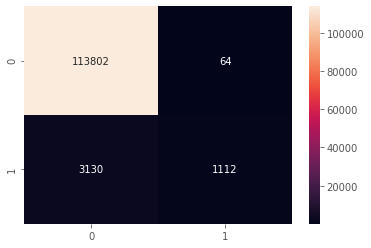

In [379]:
# For real testing:

y_pred = clf.predict(X_)

print(classification_report(y_, y_pred))
accuracy = accuracy_score(y_pred, y_)
print(f'Accuracy is {accuracy}')

tn, fp, fn, tp = confusion_matrix(y_,y_pred).ravel()
print(tn, fp, fn, tp)
cm = confusion_matrix(y_, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

## XGBoost

In [63]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#Booster parameters

xg_class = xgb.XGBClassifier(learning_rate = 0.08,
                max_depth = 10, n_estimators = 500,num_boost_round=150,random_state=42)

xg_class.fit(X_train,y_train)

y_pred = xg_class.predict(X_test)

#20, 1000

[[90991   103]
 [ 1470  1923]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     91094
         1.0       0.95      0.57      0.71      3393

    accuracy                           0.98     94487
   macro avg       0.97      0.78      0.85     94487
weighted avg       0.98      0.98      0.98     94487

0.9833522071819404


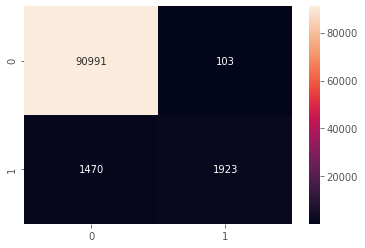

In [64]:

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",xticklabels=True,yticklabels=True);

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    113866
         1.0       0.96      0.57      0.72      4242

    accuracy                           0.98    118108
   macro avg       0.97      0.79      0.85    118108
weighted avg       0.98      0.98      0.98    118108

Accuracy is 0.9836928912520744


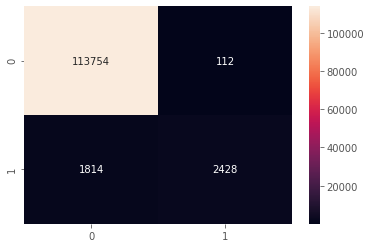

In [65]:
# For real testing:

y_pred = xg_class.predict(X_)


print(classification_report(y_, y_pred))
accuracy = accuracy_score(y_pred, y_)
print(f'Accuracy is {accuracy}')
cm = confusion_matrix(y_, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

In [66]:
# Save model LGBM
from sklearn.externals import joblib
joblib.dump(xg_class, 'xg_class.sav')

['xg_class.sav']

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    113866
         1.0       0.94      0.61      0.74      4242

    accuracy                           0.98    118108
   macro avg       0.96      0.80      0.86    118108
weighted avg       0.98      0.98      0.98    118108

Accuracy is 0.9844549056795475


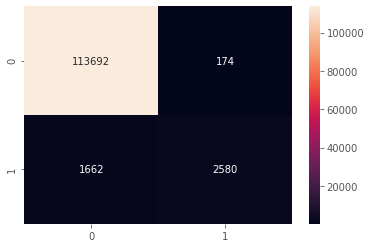

In [67]:
# For real testing:

y_pred = xg_class.predict_proba(X_)[:,1]
for i in range(0,len(y_pred)):
#     print(y_pred[i])
    #convert into binary values
    if (y_pred[i] >= 0.4):
        y_pred[i] = 1
    else:
        y_pred[i] =0

print(classification_report(y_, y_pred))
accuracy = accuracy_score(y_pred, y_)
print(f'Accuracy is {accuracy}')
cm = confusion_matrix(y_, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

## Logistic Regression

In [30]:

lin_model = LogisticRegression()
lin_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Testing Accuracy is:  0.9700805401801306
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     91094
         1.0       0.82      0.21      0.34      3393

    accuracy                           0.97     94487
   macro avg       0.90      0.61      0.66     94487
weighted avg       0.97      0.97      0.96     94487

*************************************************



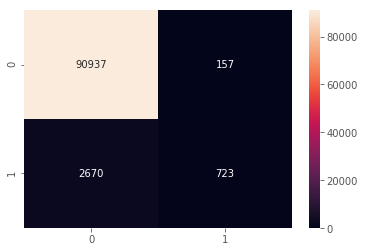

In [31]:
#
y_pred = lin_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Testing Accuracy is: ',acc)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))
print('*************************************************\n')

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    113866
         1.0       0.85      0.21      0.34      4242

    accuracy                           0.97    118108
   macro avg       0.91      0.60      0.66    118108
weighted avg       0.97      0.97      0.96    118108

Accuracy is 0.9702814373285468


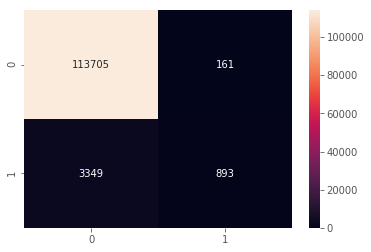

In [32]:
# For real testing:

y_pred = lin_model.predict(X_)


print(classification_report(y_, y_pred))
accuracy = accuracy_score(y_pred, y_)
print(f'Accuracy is {accuracy}')
cm = confusion_matrix(y_, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

In [35]:
# Save the top 350 features for future testing:

df = test[new_features]
print(df.head())
df.to_csv('testing_350features.csv')

      card1     card3     card5        C1        C2        C4        C5  \
0  0.392389  0.381679  0.905109  0.000640  0.000176  0.000000  0.000000   
1  0.663601  0.381679  0.919708  0.000427  0.000176  0.000000  0.000000   
2  0.482870  0.381679  0.905109  0.000213  0.000176  0.000000  0.005731   
3  0.855656  0.648855  0.277372  0.000427  0.000527  0.000444  0.000000   
4  0.833352  0.381679  0.919708  0.002134  0.002460  0.000000  0.031519   

         C6        C7   C8  ...  id_34_match_status:2  id_35_NotFound  \
0  0.000444  0.000000  0.0  ...                   0.0             1.0   
1  0.000444  0.000000  0.0  ...                   0.0             1.0   
2  0.000444  0.000000  0.0  ...                   0.0             1.0   
3  0.000444  0.000443  0.0  ...                   0.0             1.0   
4  0.003551  0.000000  0.0  ...                   0.0             1.0   

   id_35_T  id_36_NotFound  id_37_NotFound  id_37_T  id_38_NotFound  id_38_T  \
0      0.0             1.0    

# Functions

In [6]:
def binary_encoder(DataFrame, col):

    # Using the binary encoder to deal with large_col_cat:

    df = DataFrame[col]

    # Calling encoder function.
    encoder = ce.BinaryEncoder(cols=col)
    df_binary = encoder.fit_transform(df)
    return df_binary
    # Concat the features with previous dataset
#     DataFrame = pd.concat([DataFrame,df_binary],axis=1)
#     DataFrame.drop(columns=col, inplace=True)
    print(f'************** Finish binary_encoder *****************')

In [7]:
def get_dummies_label(DataFrame, col):
    # Using dummies to deal with the small amount of unique values in small_col_cat
    df_small = DataFrame[col]
    # Get dummies
    df_dummies = pd.get_dummies(df_small, prefix_sep='_', drop_first=True)
    return df_dummies
    # Concat the features with previous dataset
#     DataFrame = pd.concat([DataFrame,df_dummies],axis=1)
#     DataFrame.drop(columns=col, inplace=True)
    
    print(f'************** Finish get_dummies_label *****************')

In [17]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()